# Import necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Model metrics for evaluation and data splitting & KFold
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_val_predict
from sklearn import metrics

# Visualization for missing data
import missingno as msno

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Model building
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
    BaggingRegressor,
)


# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

from xgboost import XGBRegressor

#SHAP
import shap

# Data loading

In [2]:
All = pd.ExcelFile('allData.xls')
data = pd.read_excel(All, 'Data')
data

,Number,Data source,Selected,Mix number in literature,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),...,Annual average temperature of exposed environment (Celsius degree),Annual wetting times/rainy days of exposed environment (d),Annual average precipitation of exposed environment (mm),Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size,Note
0,NaN,2. Yunusa 2014,NaN,PC-40,0.000,0.000,450.000,0.000,0.000,0.000,...,24.300,0.000,0.000,30.000,75.930,NaN,NaN,3.139,NaN,No significant effect of initial water curing ...
1,NaN,2. Yunusa 2014,NaN,PC-50,0.000,0.000,400.000,0.000,0.000,0.000,...,24.300,0.000,0.000,60.000,64.500,NaN,NaN,4.022,NaN,NaN
2,NaN,2. Yunusa 2014,NaN,PC-60,0.000,0.000,350.000,0.000,0.000,0.000,...,24.300,0.000,0.000,100.000,49.230,NaN,NaN,6.670,NaN,NaN
3,NaN,2. Yunusa 2014,NaN,PC-75,0.000,0.000,300.000,0.000,0.000,0.000,...,24.300,0.000,0.000,140.000,36.000,NaN,NaN,7.945,NaN,NaN
4,NaN,2. Yunusa 2014,NaN,FA-40,0.000,0.000,315.000,0.000,135.000,0.000,...,24.300,0.000,0.000,40.000,62.800,NaN,NaN,6.052,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,NaN,"J48. Farahani, 2015",NaN,W3-4,350.000,0.000,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.550,NaN,150*150*150,NaN
1984,NaN,"J48. Farahani, 2015",NaN,W4-1,380.000,0.000,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.375,NaN,150*150*150,NaN
1985,NaN,"J48. Farahani, 2015",NaN,W4-2,370.000,0.000,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,150*150*150,NaN
1986,NaN,"J48. Farahani, 2015",NaN,W4-3,360.000,0.000,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.500,NaN,150*150*150,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 34 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Number                                                              0 non-null      float64
 1   Data source                                                         1988 non-null   object 
 2   Selected                                                            194 non-null    object 
 3   Mix number in literature                                            1988 non-null   object 
 4   ASTM type 1 ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 5   CEM I 42.5N ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 6   CEM I 52.5N ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 7   Class C Fly ash

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTM type 1 ordinary Portland Cement content (kg/m^3),1988.000,39.318,106.826,0.000,0.000,0.000,0.000,702.000
CEM I 42.5N ordinary Portland Cement content (kg/m^3),1988.000,95.567,146.591,0.000,0.000,0.000,210.000,547.000
CEM I 52.5N ordinary Portland Cement content (kg/m^3),1988.000,147.093,152.375,0.000,0.000,155.000,280.000,660.000
Class C Fly ash content (kg/m^3),1988.000,6.120,28.792,0.000,0.000,0.000,0.000,225.000
Class F Fly ash content (kg/m^3),1988.000,35.498,65.745,0.000,0.000,0.000,56.500,544.000
Slag content (kg/m^3),1988.000,34.630,73.838,0.000,0.000,0.000,0.000,440.000
Silica fume content (kg/m^3),1988.000,7.593,21.082,0.000,0.000,0.000,0.000,150.000
Water content (kg/m^3),1988.000,172.241,28.372,105.000,153.000,170.000,186.000,295.000
Superplasticizer content (kg/m^3),1988.000,2.336,4.726,0.000,0.000,0.000,2.703,35.100


In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

Number                                                                1988
Data source                                                              0
Selected                                                              1794
Mix number in literature                                                 0
ASTM type 1 ordinary Portland Cement content (kg/m^3)                    0
CEM I 42.5N ordinary Portland Cement content (kg/m^3)                    0
CEM I 52.5N ordinary Portland Cement content (kg/m^3)                    0
Class C Fly ash content (kg/m^3)                                         0
Class F Fly ash content (kg/m^3)                                         0
Slag content (kg/m^3)                                                    0
Silica fume content (kg/m^3)                                             0
Water content (kg/m^3)                                                   0
Superplasticizer content (kg/m^3)                                        0
Maximum coarse aggregate 

In [7]:
Excess_col_indices =[0] + list(range(2, 4)) + list(range(20, 27)) + [33]
semi_df = data.iloc[:, [col for col in range(data.shape[1]) if col not in Excess_col_indices]]
semi_df

,Data source,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),...,Curing method,Curing temperature (Celsius degree),Curing humidity (%),Curing day,Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size
0,2. Yunusa 2014,0.000,0.000,450.000,0.000,0.000,0.000,0.000,180.000,4.000,...,Submerged,20.000,100.000,3.000,30.000,75.930,NaN,NaN,3.139,NaN
1,2. Yunusa 2014,0.000,0.000,400.000,0.000,0.000,0.000,0.000,200.000,3.250,...,Submerged,20.000,100.000,3.000,60.000,64.500,NaN,NaN,4.022,NaN
2,2. Yunusa 2014,0.000,0.000,350.000,0.000,0.000,0.000,0.000,210.000,0.000,...,Submerged,20.000,100.000,3.000,100.000,49.230,NaN,NaN,6.670,NaN
3,2. Yunusa 2014,0.000,0.000,300.000,0.000,0.000,0.000,0.000,225.000,0.000,...,Submerged,20.000,100.000,3.000,140.000,36.000,NaN,NaN,7.945,NaN
4,2. Yunusa 2014,0.000,0.000,315.000,0.000,135.000,0.000,0.000,180.000,1.750,...,Submerged,20.000,100.000,3.000,40.000,62.800,NaN,NaN,6.052,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,"J48. Farahani, 2015",350.000,0.000,0.000,0.000,0.000,0.000,50.000,180.000,2.000,...,Submerged,21.000,100.000,28.000,NaN,NaN,NaN,1.550,NaN,150*150*150
1984,"J48. Farahani, 2015",380.000,0.000,0.000,0.000,0.000,0.000,20.000,200.000,0.800,...,Submerged,21.000,100.000,28.000,NaN,NaN,NaN,3.375,NaN,150*150*150
1985,"J48. Farahani, 2015",370.000,0.000,0.000,0.000,0.000,0.000,30.000,200.000,1.200,...,Submerged,21.000,100.000,28.000,NaN,NaN,NaN,1.000,NaN,150*150*150
1986,"J48. Farahani, 2015",360.000,0.000,0.000,0.000,0.000,0.000,40.000,200.000,1.800,...,Submerged,21.000,100.000,28.000,NaN,NaN,NaN,0.500,NaN,150*150*150


# Feature Engineering

## Quick fix on the compressive strength

In [8]:
# function to plot a boxplot and a histogram along the same scale.

def hist_boxplot(data, feature, figsize = (12,7),kde = True, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,
        sharex= True,
        gridspec_kw ={'height_ratios': (0.25,0.75)},
        figsize = figsize)
    sns.boxplot(data=data, x =feature, ax = ax_box2, showmeans = True, color = 'violet')

    if bins:
        sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, bins=bins, palette = 'winter')

    else:
        sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, palette = 'winter')
    ax_hist2.axvline(data[feature].mean(), color = 'green', linestyle = "--")
    ax_hist2.axvline(data[feature].median(), color = 'black', linestyle = "-")

Ignoring `palette` because no `hue` variable has been assigned.


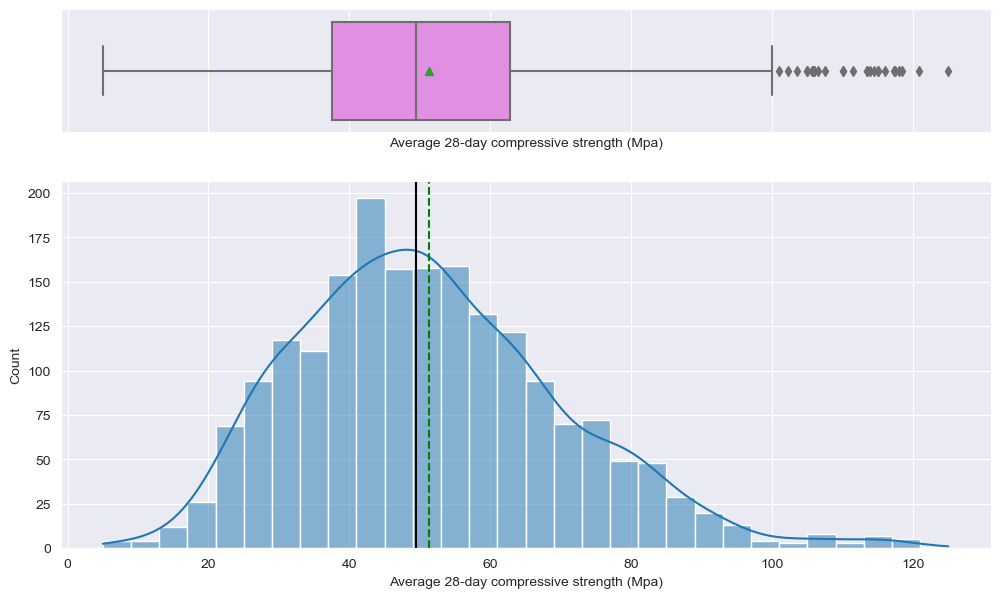

In [9]:
# Quick fix 

filtered_row = semi_df[semi_df['Average 28-day compressive strength (Mpa)'] > 400]

if len(filtered_row) == 1:
    value_to_divide = filtered_row['Average 28-day compressive strength (Mpa)'].values[0]
    updated_value = value_to_divide / 10

    # Update the value in the DataFrame
    semi_df.loc[semi_df['Average 28-day compressive strength (Mpa)'] > 400, 'Average 28-day compressive strength (Mpa)'] = updated_value
else:
    print("No rows or multiple rows matching the condition.")

hist_boxplot(semi_df, 'Average 28-day compressive strength (Mpa)')

## Curing method

In [10]:
num_df = semi_df.select_dtypes(include=np.number)
obj_df = semi_df.select_dtypes(include=['object'])

In [11]:
for col in obj_df.columns:
    value_counts = obj_df[col].value_counts()
    print(f"Column '{col}':")
    print(value_counts)
    print()

Column 'Data source':
1. Vu 2019            405
2. Yunusa 2014        144
J20. Atiş, 2005        96
J18. Cengiz 2006       90
20 Lollini 2021        72
                     ... 
11 Sundar 2017          4
22 Zhao 2021            4
J6. Li 1997             4
J30. Siddique 2004      4
J9. Li 2002             3
Name: Data source, Length: 71, dtype: int64

Column 'Curing method':
Submerged    837
Moist        503
Sealed       456
Air          184
Name: Curing method, dtype: int64

Column 'Specimen size':
150*150*150    461
200h*100r      215
100*100*100    158
100*100*300     22
300h*150r       12
100h*100r        5
Name: Specimen size, dtype: int64


In [12]:
curing_method = {'Air':0,
                 'Sealed':1,
                 'Moist':2,
                 'Submerged':3,
                 }

semi_df['Curing method'] = semi_df['Curing method'].map(curing_method)
semi_df['Curing method'].value_counts()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


3.000    837
2.000    503
1.000    456
0.000    184
Name: Curing method, dtype: int64

In [13]:
new_df = semi_df.copy()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 23 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Data source                                            1988 non-null   object 
 1   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 2   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 3   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 4   Class C Fly ash content (kg/m^3)                       1988 non-null   float64
 5   Class F Fly ash content (kg/m^3)                       1988 non-null   float64
 6   Slag content (kg/m^3)                                  1988 non-null   float64
 7   Silica fume content (kg/m^3)                           1988 non-null   float64
 8   Water content (kg/m^3)                          

In [14]:
new_df = new_df.drop(['Curing humidity (%)', 'Curing day','Slump (mm)', 'Average carbonation coefficient (mm/year^0.5)', 'Chloride diffusion coefficient (10-12 m2/s)', 'Average 28-day compressive strength (Mpa)', 'Specimen size'], axis = 1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 16 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Data source                                            1988 non-null   object 
 1   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 2   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 3   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 4   Class C Fly ash content (kg/m^3)                       1988 non-null   float64
 5   Class F Fly ash content (kg/m^3)                       1988 non-null   float64
 6   Slag content (kg/m^3)                                  1988 non-null   float64
 7   Silica fume content (kg/m^3)                           1988 non-null   float64
 8   Water content (kg/m^3)                          

In [15]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ASTM type 1 ordinary Portland Cement content (kg/m^3),1988.000,39.318,106.826,0.000,0.000,0.000,0.000,702.000
CEM I 42.5N ordinary Portland Cement content (kg/m^3),1988.000,95.567,146.591,0.000,0.000,0.000,210.000,547.000
CEM I 52.5N ordinary Portland Cement content (kg/m^3),1988.000,147.093,152.375,0.000,0.000,155.000,280.000,660.000
Class C Fly ash content (kg/m^3),1988.000,6.120,28.792,0.000,0.000,0.000,0.000,225.000
Class F Fly ash content (kg/m^3),1988.000,35.498,65.745,0.000,0.000,0.000,56.500,544.000
Slag content (kg/m^3),1988.000,34.630,73.838,0.000,0.000,0.000,0.000,440.000
Silica fume content (kg/m^3),1988.000,7.593,21.082,0.000,0.000,0.000,0.000,150.000
Water content (kg/m^3),1988.000,172.241,28.372,105.000,153.000,170.000,186.000,295.000
Superplasticizer content (kg/m^3),1988.000,2.336,4.726,0.000,0.000,0.000,2.703,35.100
Maximum coarse aggregate size (mm),1988.000,18.122,3.829,9.500,16.000,20.000,20.000,30.000


# Missing values

<Axes: >

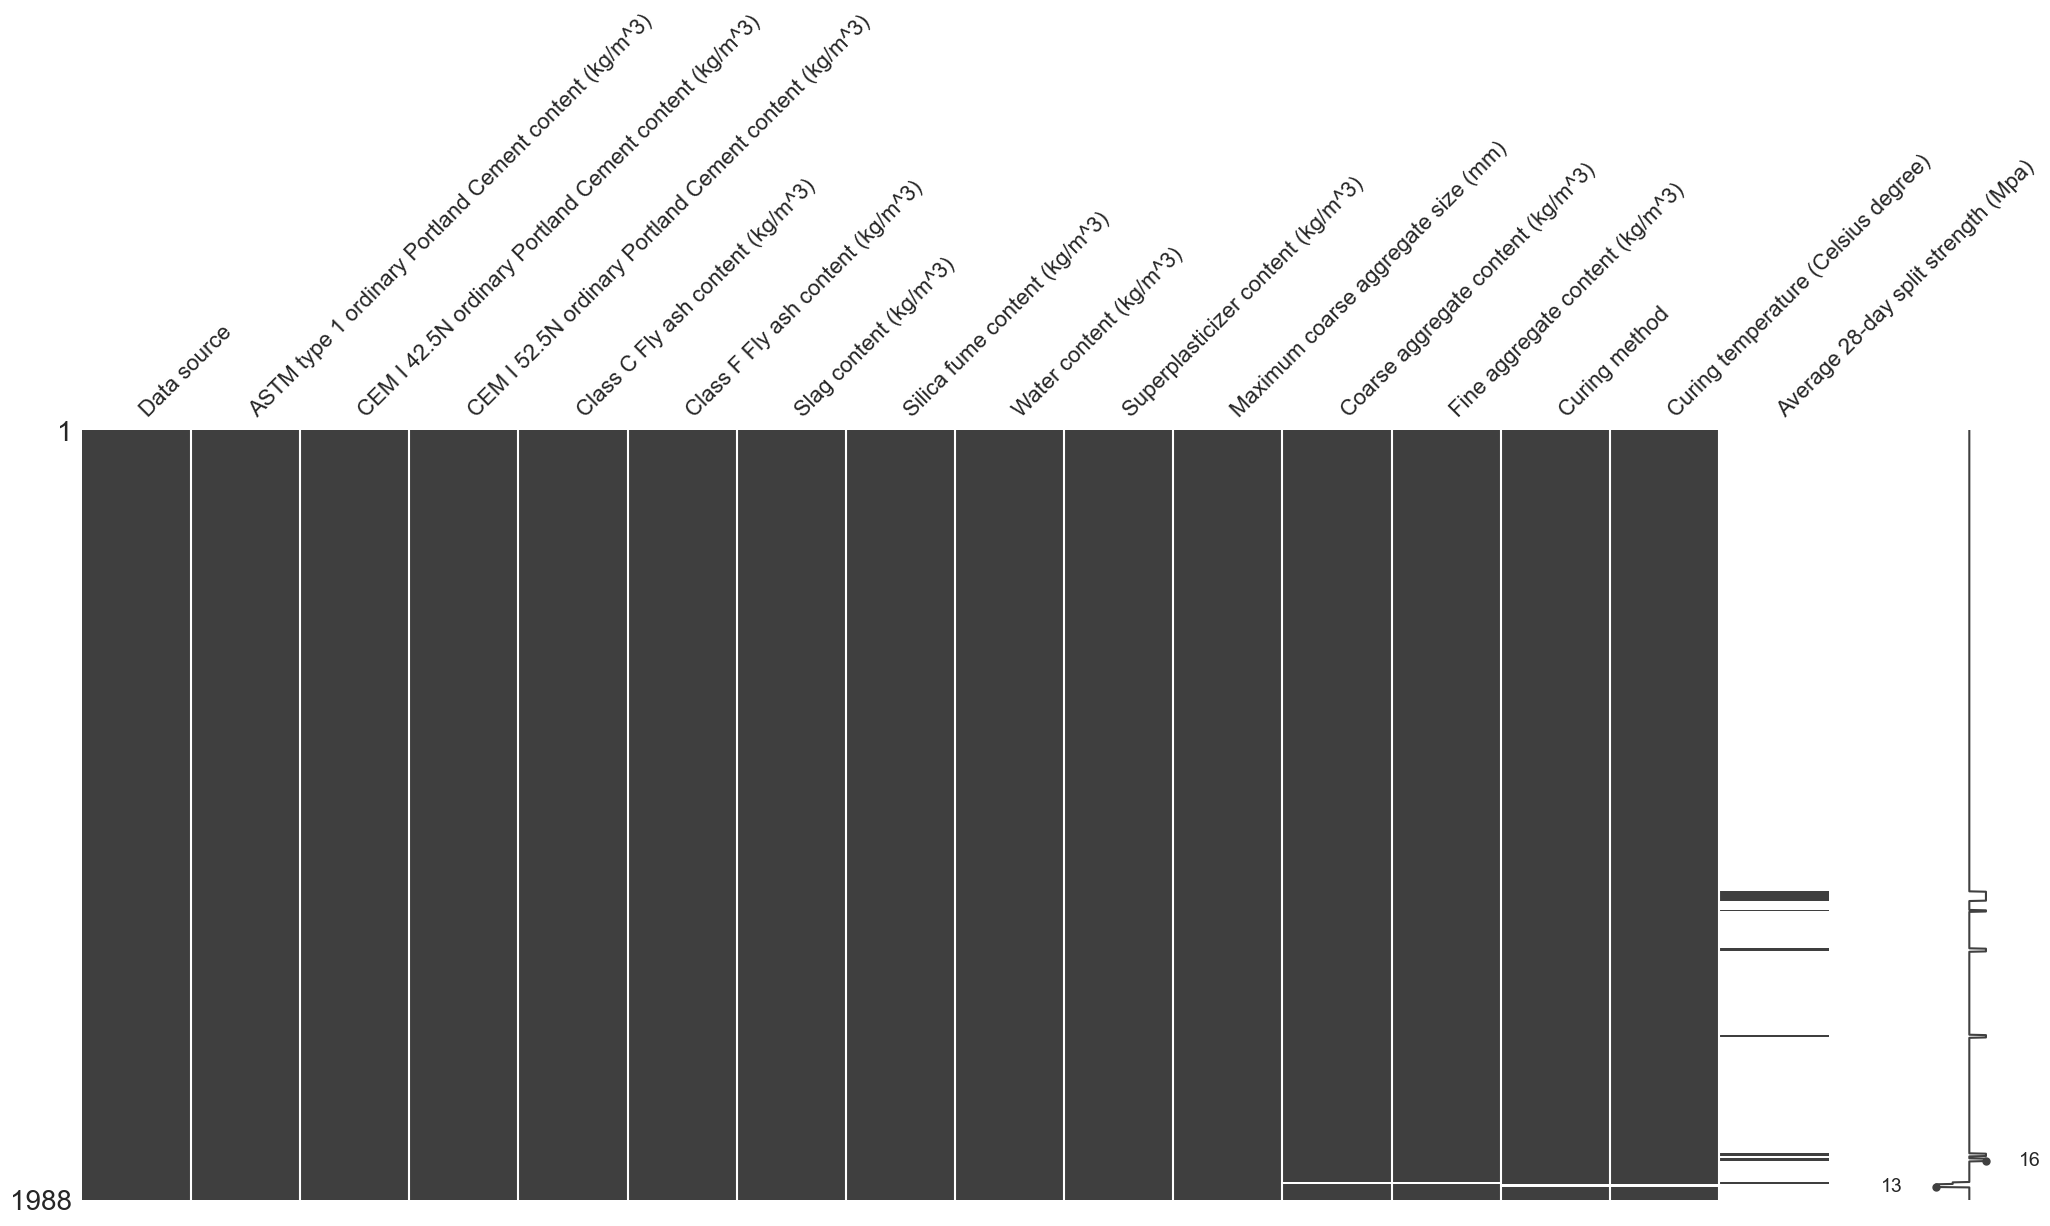

In [16]:
msno.matrix(new_df)

<Axes: >

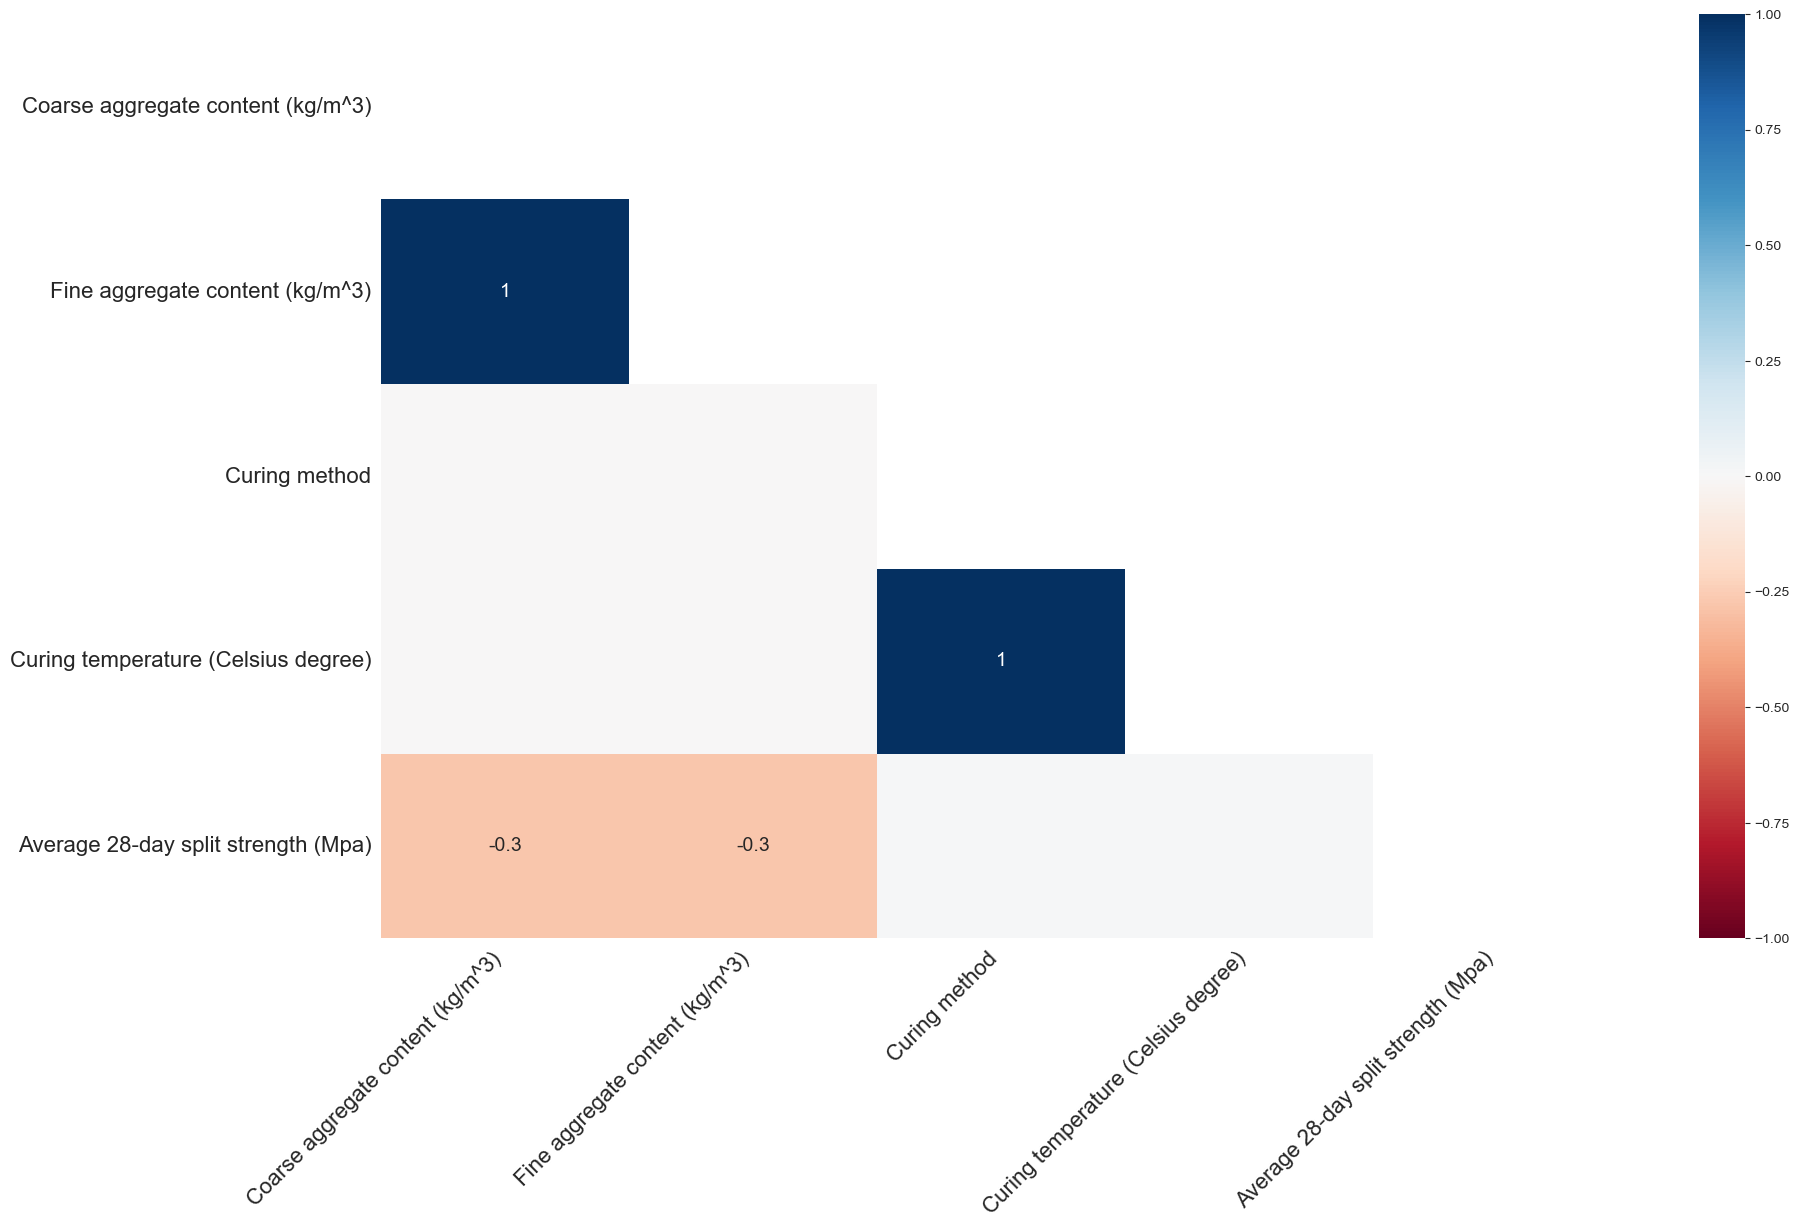

In [17]:
msno.heatmap(new_df)

# Drop na

In [18]:
new_df_drop = new_df.copy()
new_df_drop.dropna(inplace = True)

In [19]:
new_df_drop.isnull().sum()

Data source                                              0
ASTM type 1 ordinary Portland Cement content (kg/m^3)    0
CEM I 42.5N ordinary Portland Cement content (kg/m^3)    0
CEM I 52.5N ordinary Portland Cement content (kg/m^3)    0
Class C Fly ash content (kg/m^3)                         0
Class F Fly ash content (kg/m^3)                         0
Slag content (kg/m^3)                                    0
Silica fume content (kg/m^3)                             0
Water content (kg/m^3)                                   0
Superplasticizer content (kg/m^3)                        0
Maximum coarse aggregate size (mm)                       0
Coarse aggregate content (kg/m^3)                        0
Fine aggregate content (kg/m^3)                          0
Curing method                                            0
Curing temperature (Celsius degree)                      0
Average 28-day split strength (Mpa)                      0
dtype: int64

In [20]:
new_df_drop.describe().T

,count,mean,std,min,25%,50%,75%,max
ASTM type 1 ordinary Portland Cement content (kg/m^3),57.000,167.658,177.562,0.000,0.000,180.000,340.000,500.000
CEM I 42.5N ordinary Portland Cement content (kg/m^3),57.000,47.895,129.142,0.000,0.000,0.000,0.000,520.000
CEM I 52.5N ordinary Portland Cement content (kg/m^3),57.000,95.037,142.014,0.000,0.000,0.000,237.200,474.000
Class C Fly ash content (kg/m^3),57.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Class F Fly ash content (kg/m^3),57.000,70.860,94.408,0.000,0.000,0.000,125.000,390.000
Slag content (kg/m^3),57.000,47.163,89.668,0.000,0.000,0.000,47.400,326.000
Silica fume content (kg/m^3),57.000,14.463,25.062,0.000,0.000,0.000,20.500,101.600
Water content (kg/m^3),57.000,173.351,19.636,148.000,150.000,176.000,182.000,210.000
Superplasticizer content (kg/m^3),57.000,1.613,2.401,0.000,0.000,0.000,3.730,7.570
Maximum coarse aggregate size (mm),57.000,16.491,6.121,10.000,10.000,20.000,20.000,30.000


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


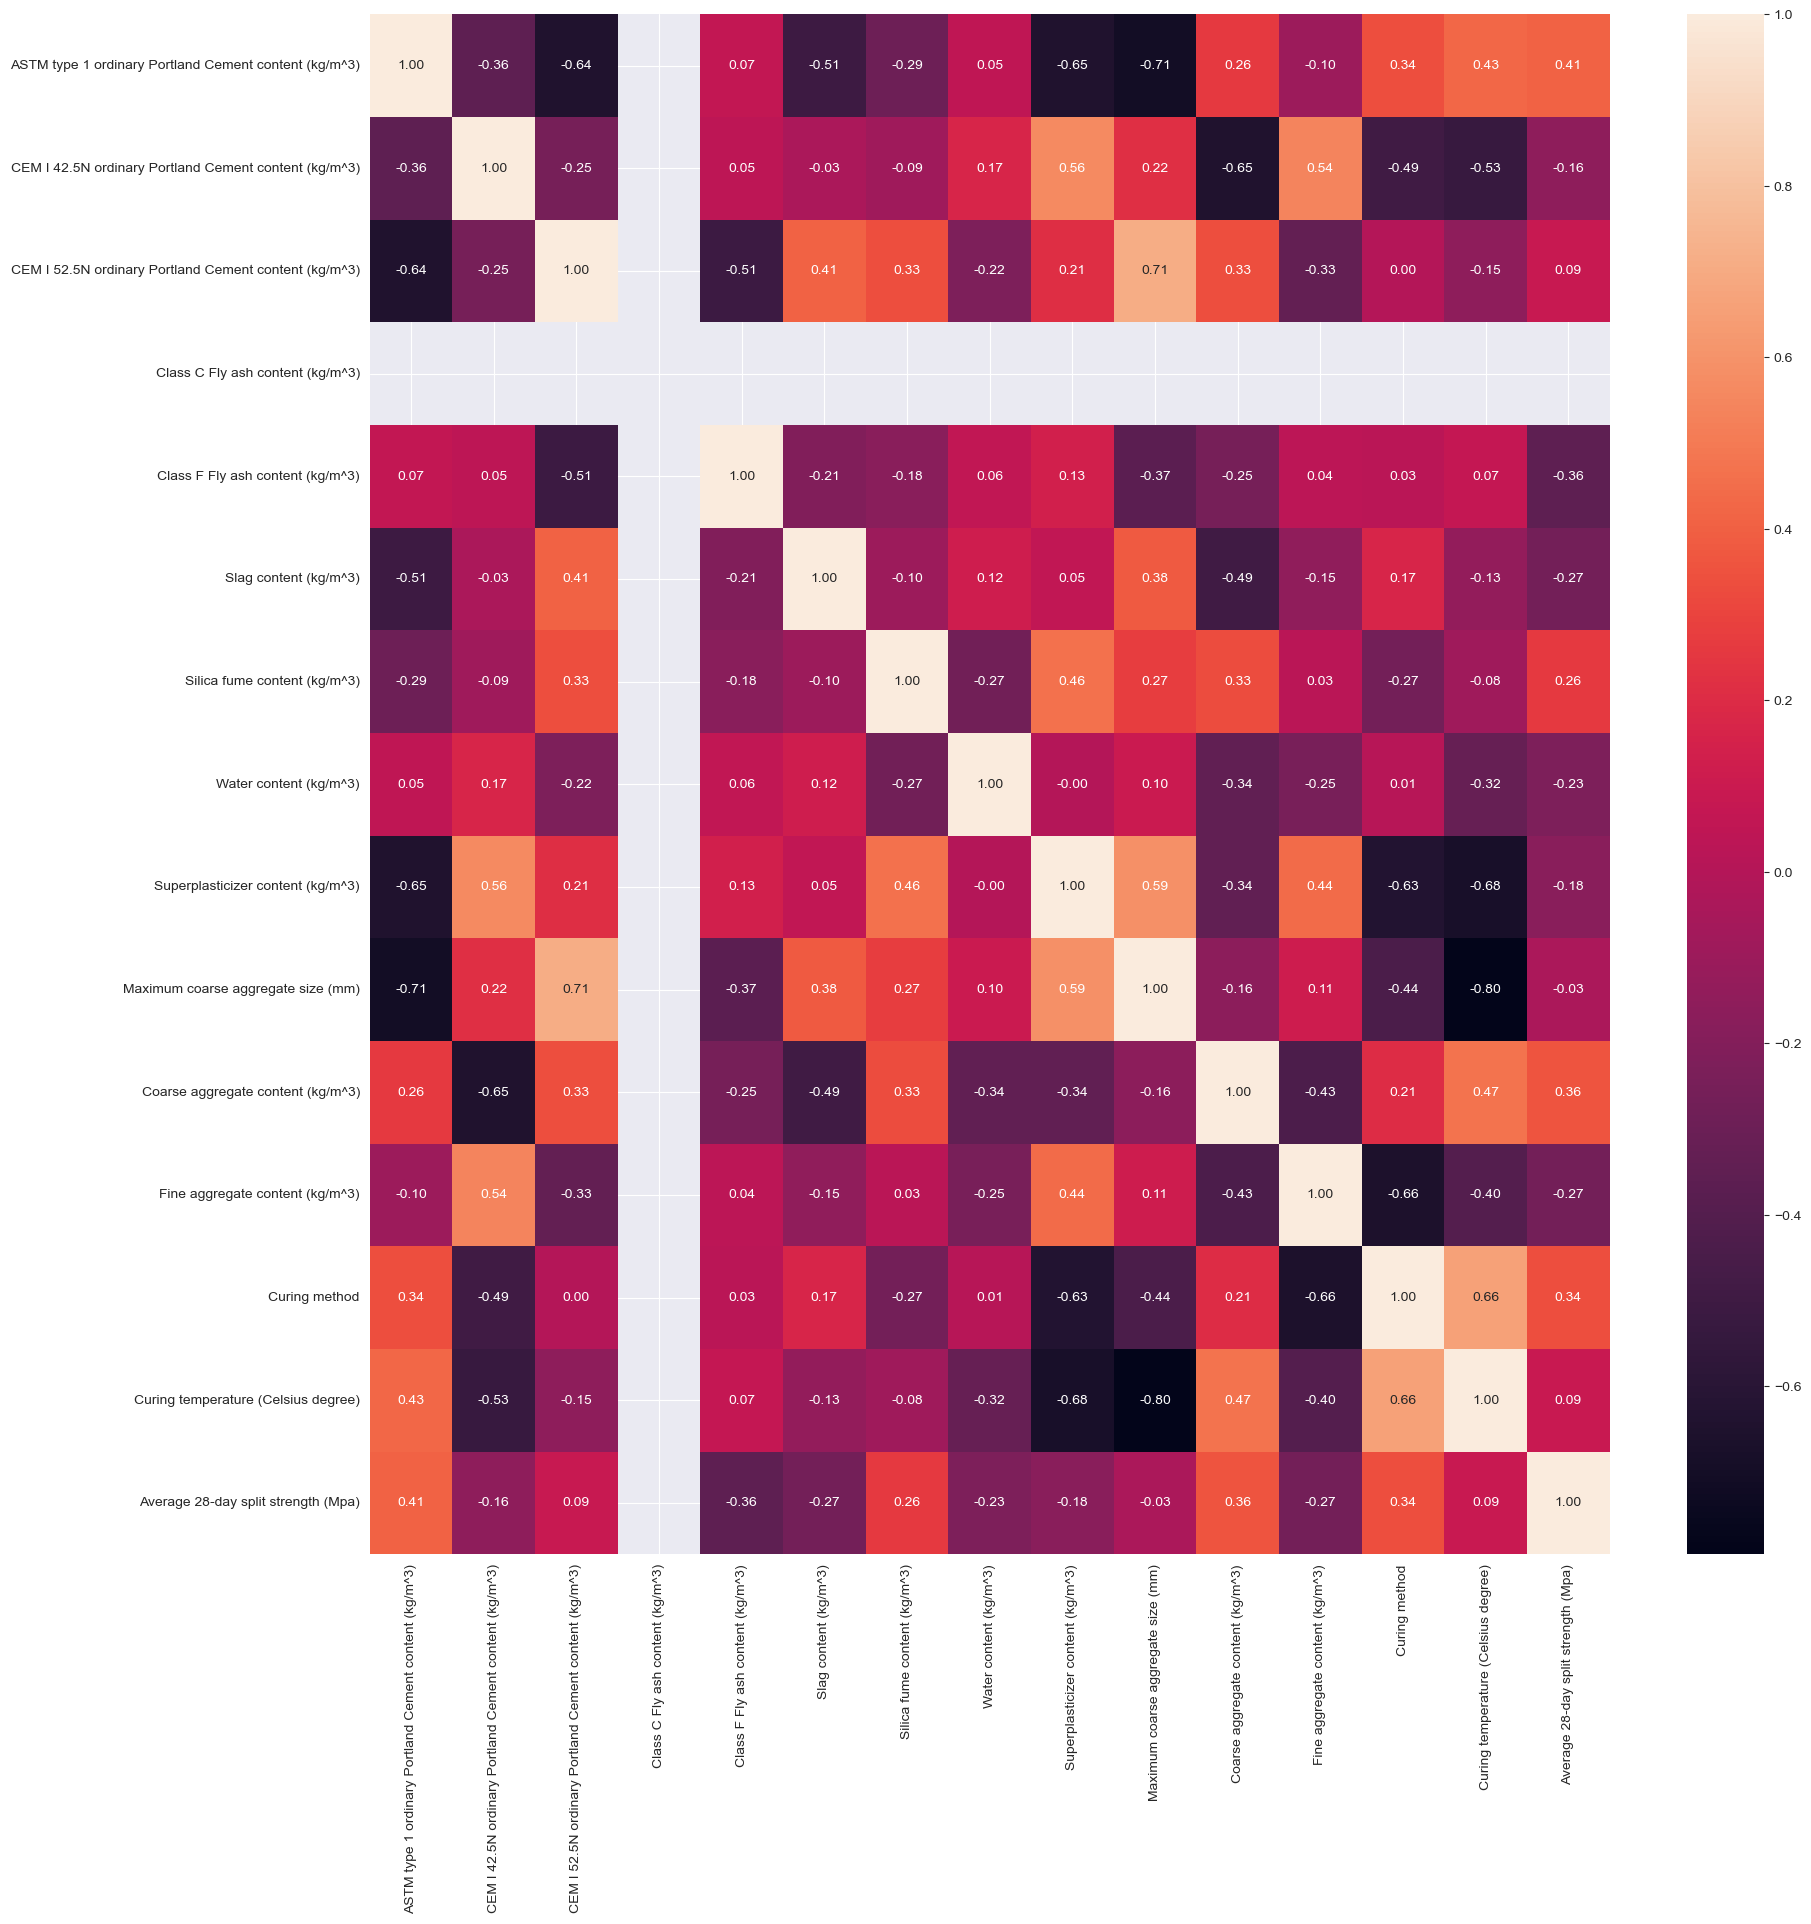

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df_drop.corr(), annot = True, fmt='.2f', cmap = 'rocket')
plt.show()

In [22]:
new_df_drop = new_df_drop.drop('Class C Fly ash content (kg/m^3)', axis =1)
new_df_drop.describe().T

,count,mean,std,min,25%,50%,75%,max
ASTM type 1 ordinary Portland Cement content (kg/m^3),57.000,167.658,177.562,0.000,0.000,180.000,340.000,500.000
CEM I 42.5N ordinary Portland Cement content (kg/m^3),57.000,47.895,129.142,0.000,0.000,0.000,0.000,520.000
CEM I 52.5N ordinary Portland Cement content (kg/m^3),57.000,95.037,142.014,0.000,0.000,0.000,237.200,474.000
Class F Fly ash content (kg/m^3),57.000,70.860,94.408,0.000,0.000,0.000,125.000,390.000
Slag content (kg/m^3),57.000,47.163,89.668,0.000,0.000,0.000,47.400,326.000
Silica fume content (kg/m^3),57.000,14.463,25.062,0.000,0.000,0.000,20.500,101.600
Water content (kg/m^3),57.000,173.351,19.636,148.000,150.000,176.000,182.000,210.000
Superplasticizer content (kg/m^3),57.000,1.613,2.401,0.000,0.000,0.000,3.730,7.570
Maximum coarse aggregate size (mm),57.000,16.491,6.121,10.000,10.000,20.000,20.000,30.000
Coarse aggregate content (kg/m^3),57.000,1075.112,135.767,832.000,971.000,1086.000,1157.000,1304.000


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


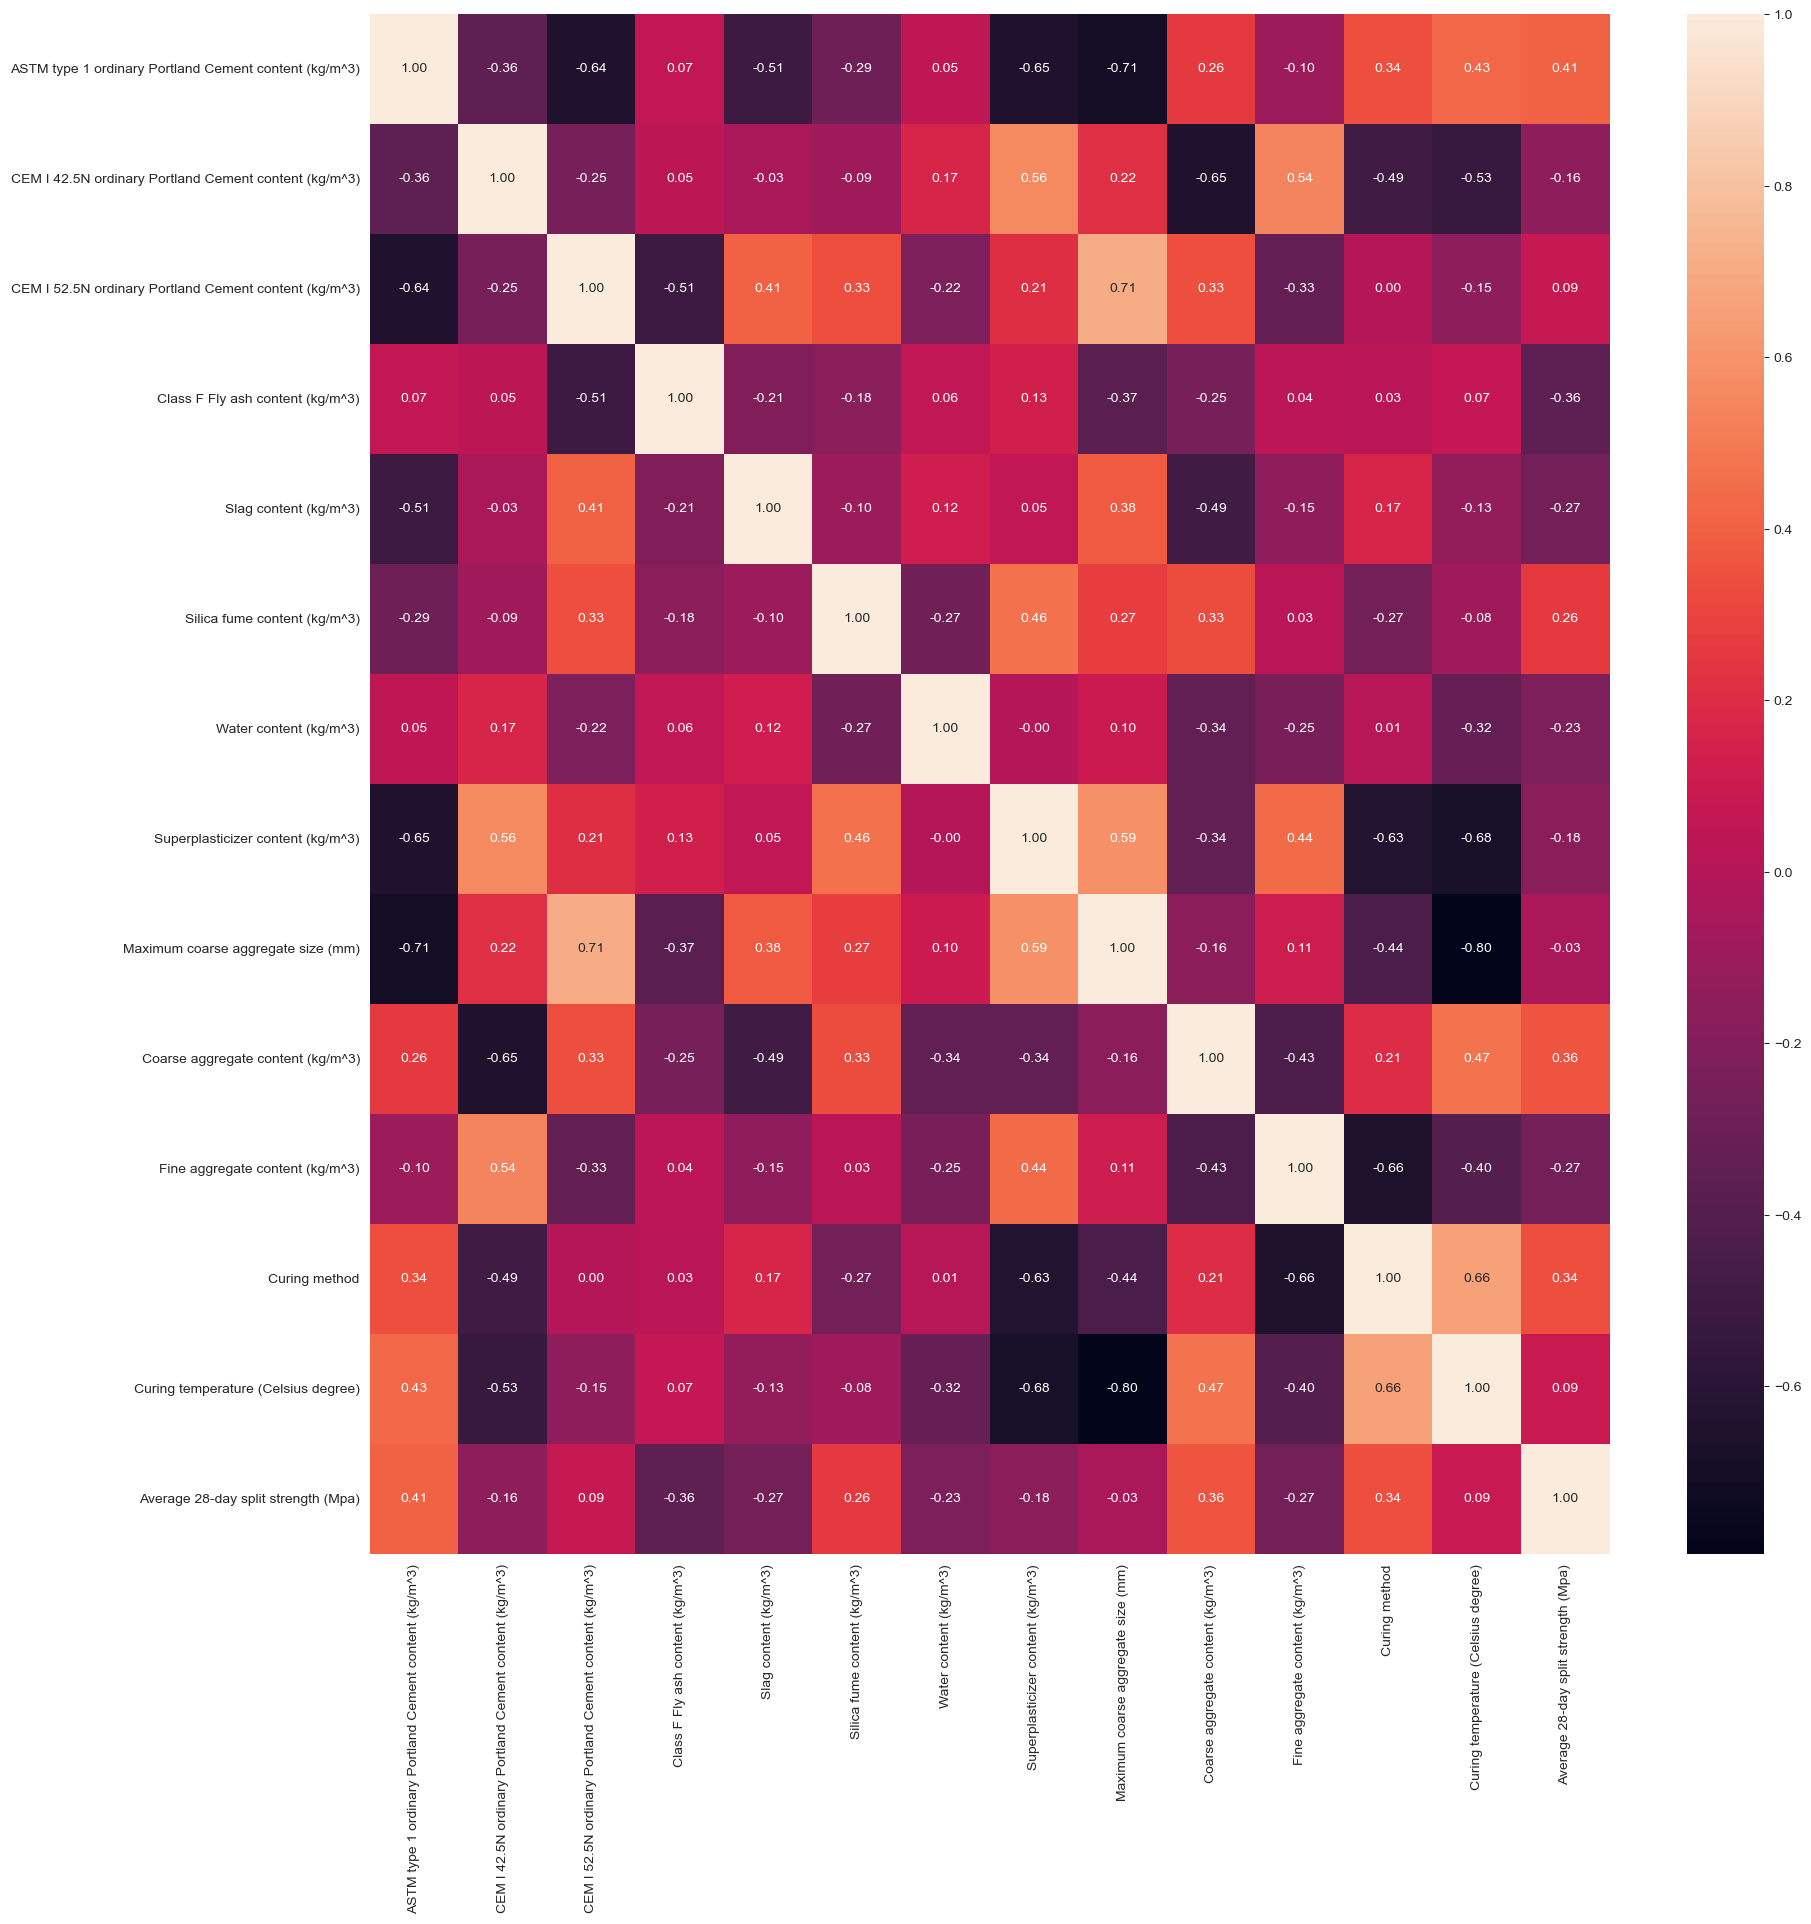

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df_drop.corr(), annot = True, fmt='.2f', cmap = 'rocket')
plt.show()

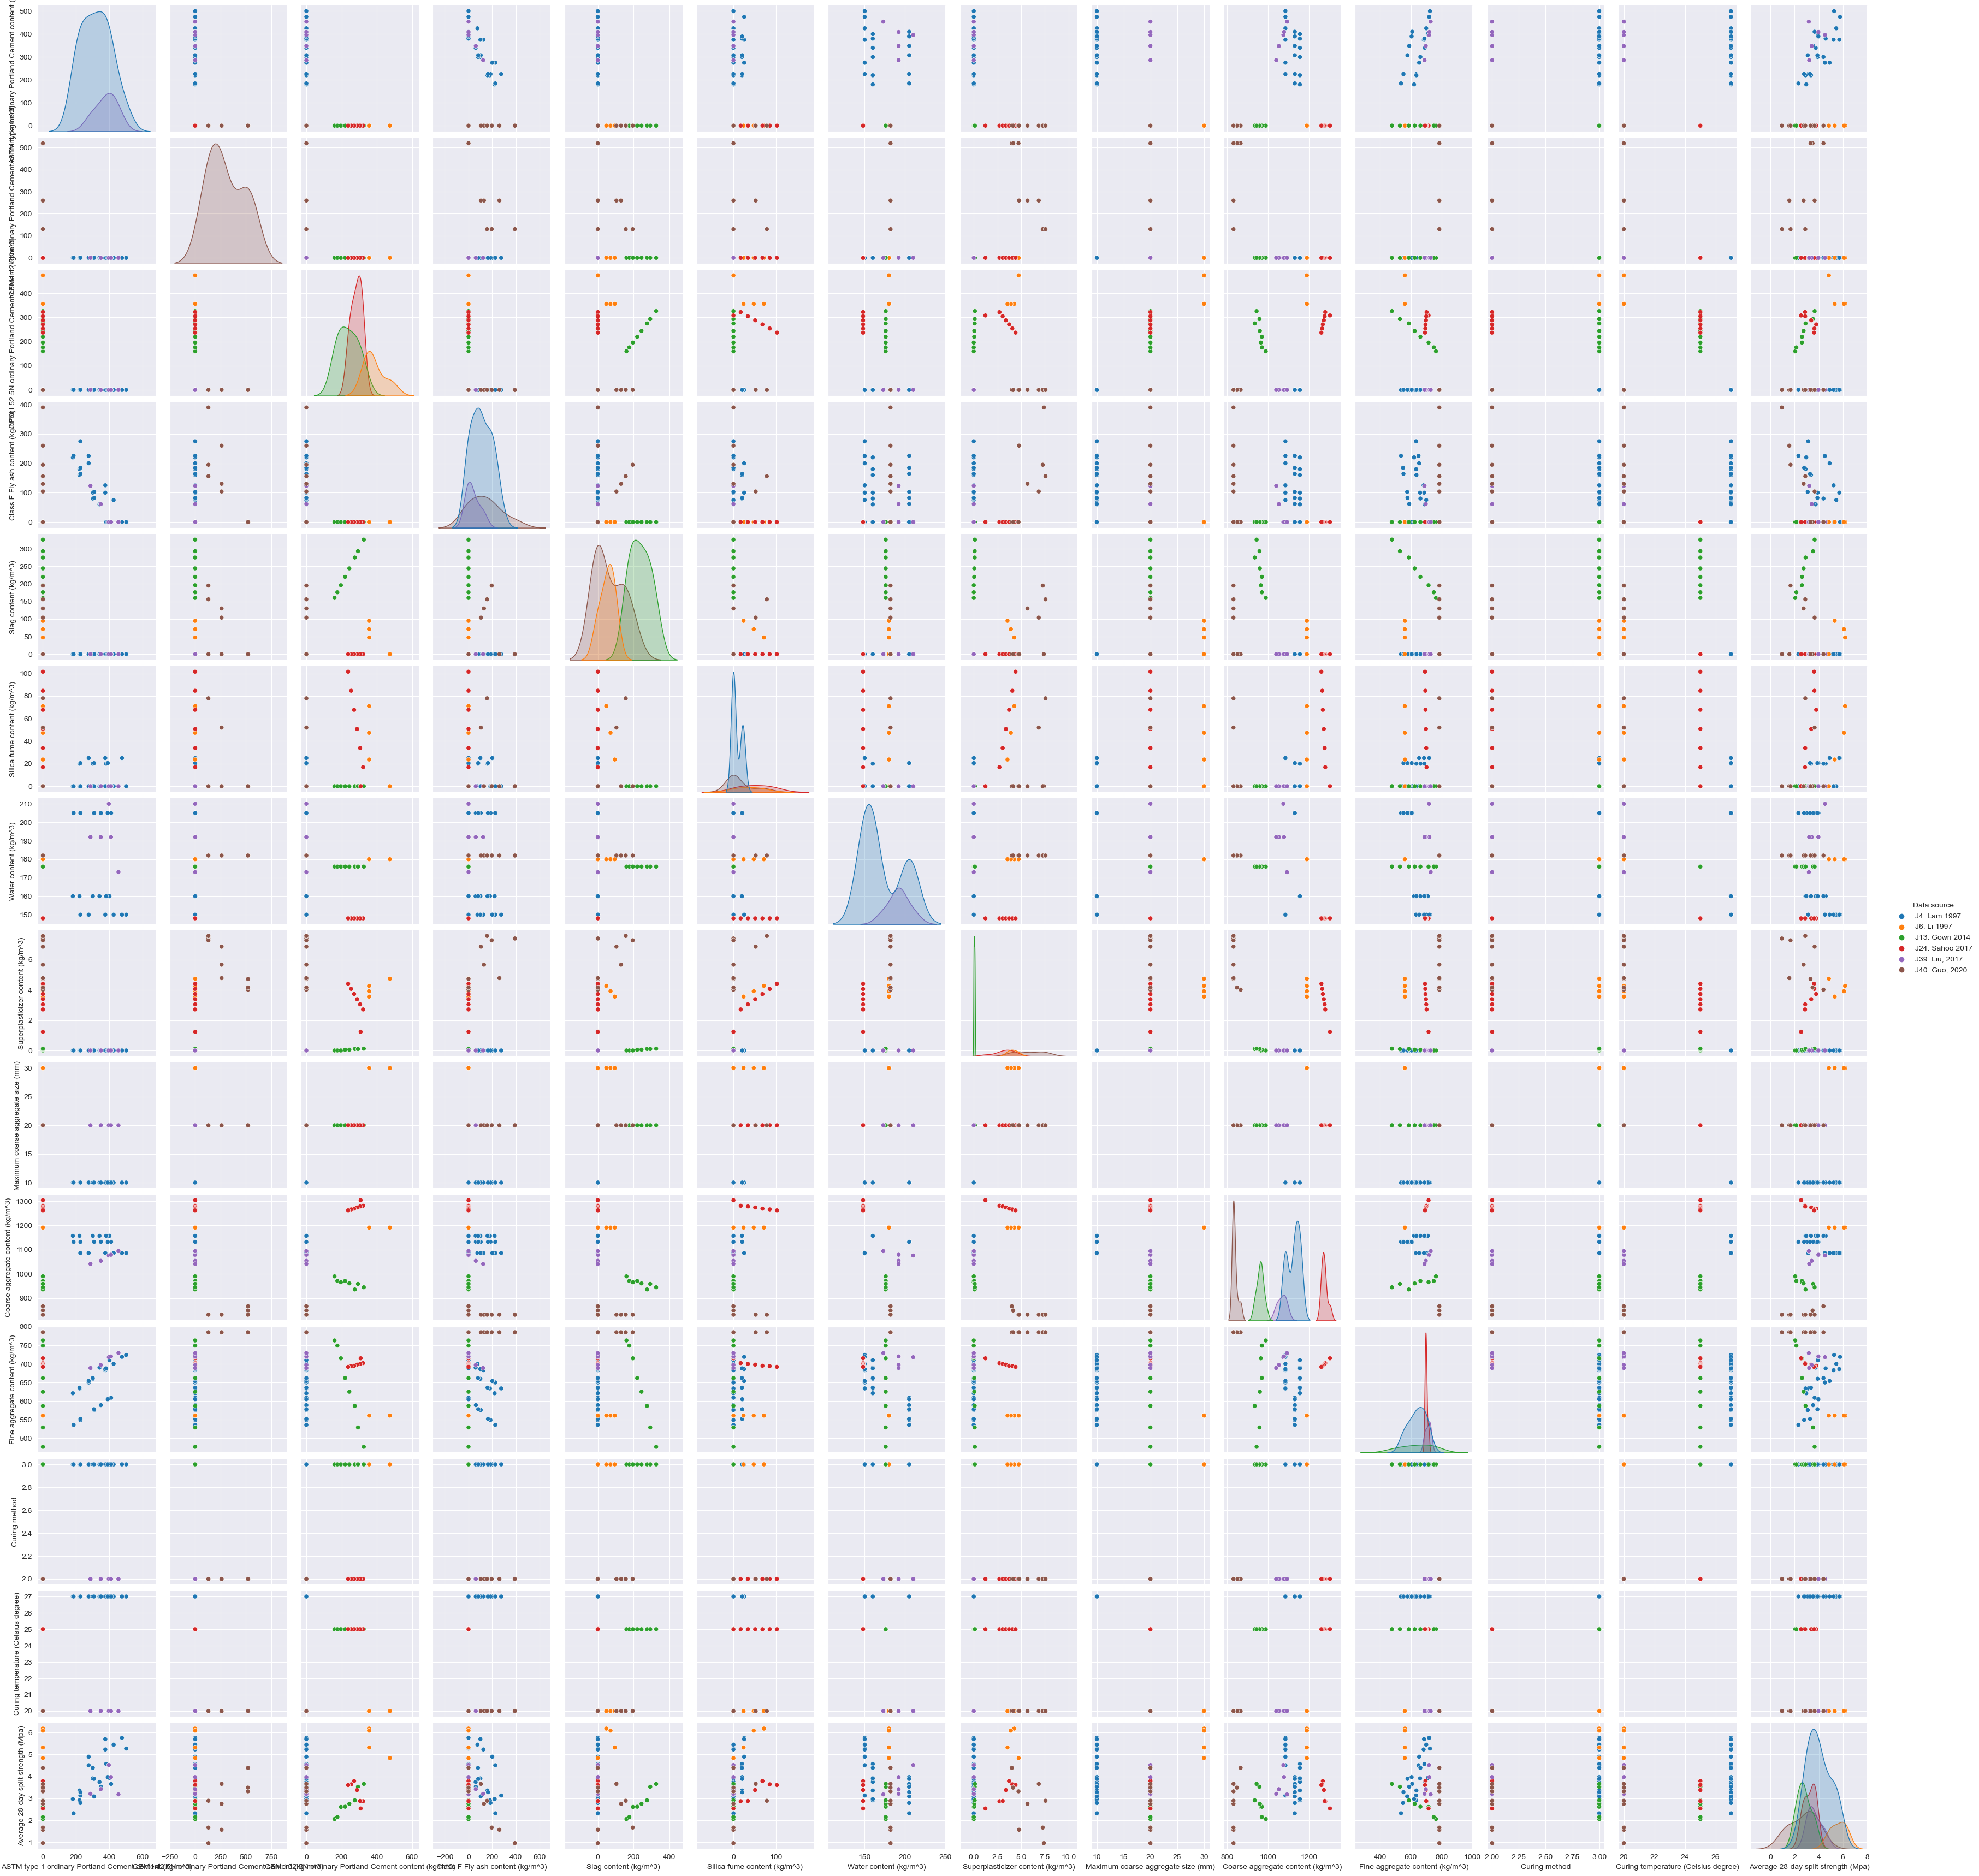

In [24]:
sns.pairplot(new_df_drop, hue= 'Data source', diag_kind= 'kde');
plt.show()

# Train test split
* Too few data, k-fold validation instead

In [25]:
new_df_drop = new_df_drop.drop('Data source', axis = 1)
X = new_df_drop.drop('Average 28-day split strength (Mpa)', axis = 1)
Y = new_df_drop['Average 28-day split strength (Mpa)']

# Model Evaluation

* MAE, RMSE, R_square, amd Adjusted R-square

In [26]:
def adjusted_r2_score(y_true, y_pred, n_samples, n_features):
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)
    return adj_r2

# K-fold

* 10 fold

In [27]:
kfold =KFold(n_splits=10, random_state=42, shuffle=True)

count = 1
for train_index, test_index in kfold.split(X,Y):
    print(f'Fold:{count}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    count+=1

Fold:1, Train set: 51, Test set:6
Fold:2, Train set: 51, Test set:6
Fold:3, Train set: 51, Test set:6
Fold:4, Train set: 51, Test set:6
Fold:5, Train set: 51, Test set:6
Fold:6, Train set: 51, Test set:6
Fold:7, Train set: 51, Test set:6
Fold:8, Train set: 52, Test set:5
Fold:9, Train set: 52, Test set:5
Fold:10, Train set: 52, Test set:5


# Model Building

In [28]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingRegressor(random_state=42)))
models.append(("Random forest", RandomForestRegressor(random_state=42)))
models.append(("AdaBoost", AdaBoostRegressor(random_state=42)))
models.append(("Gradient_Boost", GradientBoostingRegressor(random_state=42)))
models.append(("XGBoost", XGBRegressor(random_state=42)))

In [29]:
# Initialize lists to store performance metrics
results = []  # Store performance results for each model
model_names = []  # Store names of the models
mean_rmse_scores = []  # Store mean RMSE scores
mean_mae_scores = []  # Store mean MAE scores
mean_r2_scores = []  # Store mean R2 scores
mean_adj_r2_scores = []  # Store mean adjusted R2 scores

# Perform k-fold cross-validation and evaluate performance for each model
for name, model in models:
    # Perform cross-validation
    scoring = make_scorer(mean_squared_error, greater_is_better=False)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

    # Calculate RMSE from the negative mean squared error
    rmse_scores = np.sqrt(-cv_results)

    # Calculate additional performance metrics
    mae_scores = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, Y, cv=kfold, scoring='r2')
    adj_r2_scores = cross_val_score(model, X, Y, cv=kfold, scoring=make_scorer(adjusted_r2_score, n_samples=X.shape[0], n_features=X.shape[1]))

    # Store results
    results.append(rmse_scores)
    
    model_names.append(name)
    mean_rmse_scores.append(rmse_scores.mean())
    mean_mae_scores.append(-mae_scores.mean())  # Convert back to positive MAE
    mean_r2_scores.append(r2_scores.mean())
    mean_adj_r2_scores.append(adj_r2_scores.mean())

# Create a dataframe with the performance results
df_results = pd.DataFrame({
    'Model': model_names,
    'Mean RMSE': mean_rmse_scores,
    'Mean MAE': mean_mae_scores,
    'Mean R2': mean_r2_scores,
    'Mean Adj R2': mean_adj_r2_scores
})

df_results

,Model,Mean RMSE,Mean MAE,Mean R2,Mean Adj R2
0,Bagging,0.515,0.427,0.440,0.271
1,Random forest,0.476,0.395,0.598,0.476
2,AdaBoost,0.552,0.451,0.376,0.187
3,Gradient_Boost,0.445,0.353,0.692,0.598
4,XGBoost,0.501,0.415,0.508,0.360


In [30]:
fold_results = pd.DataFrame(results, index=model_names)
fold_results #RMSE

,0,1,2,3,4,5,6,7,8,9
Bagging,0.638,0.477,0.557,0.715,0.521,0.411,0.435,0.370,0.425,0.603
Random forest,0.572,0.568,0.418,0.661,0.532,0.297,0.386,0.263,0.463,0.598
AdaBoost,0.626,0.657,0.519,0.732,0.399,0.374,0.493,0.374,0.568,0.779
Gradient_Boost,0.528,0.574,0.360,0.649,0.467,0.524,0.324,0.187,0.377,0.464
XGBoost,0.818,0.706,0.330,0.592,0.459,0.531,0.347,0.342,0.413,0.468


# Hyperparameter tuning

## Bagging

In [31]:
%%time

Bagging_model = BaggingRegressor(random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],  # Number of base estimators (decision trees)
    'max_samples': [0.2, 0.3, 0.5, 0.8, 1.0],  # Proportion of samples to draw from the training set for each base estimator
    'max_features': [0.5, 0.8, 1.0],  # Proportion of features to consider for each base estimator
    'bootstrap': [True, False],  # Whether to sample with replacement (True) or without replacement (False)
    'random_state': [42]  # Random seed for reproducibility
}

scorer = metrics.make_scorer(mean_squared_error, greater_is_better=False)

randomized_cv = RandomizedSearchCV(estimator=Bagging_model, param_distributions=param_grid, n_iter=30, n_jobs = -1, scoring=scorer, cv=10, random_state=42)

randomized_cv.fit(X, Y)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'random_state': 42, 'n_estimators': 200, 'max_samples': 0.8, 'max_features': 0.8, 'bootstrap': False} with CV score=-0.8124708137585104:
CPU times: total: 1.94 s
Wall time: 14 s


In [32]:
Tuned_Bagging = randomized_cv.best_estimator_

scoring = make_scorer(mean_squared_error, greater_is_better=False)
cv_results = cross_val_score(Tuned_Bagging, X, Y, cv=kfold, scoring=scoring)

# Calculate RMSE from the negative mean squared error
rmse_scores = np.sqrt(-cv_results)

# Calculate additional performance metrics
mae_scores = cross_val_score(Tuned_Bagging, X, Y, cv=kfold, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(Tuned_Bagging, X, Y, cv=kfold, scoring='r2')
adj_r2_scores = cross_val_score(Tuned_Bagging, X, Y, cv=kfold, scoring=make_scorer(adjusted_r2_score, n_samples=X.shape[0], n_features=X.shape[1]))

# Store results
Bagging_results = rmse_scores


Mean_Bagging_rmse = [rmse_scores.mean()]
Mean_Bagging_mae = [-mae_scores.mean()]  # Convert back to positive MAE
Mean_Bagging_r2 = [r2_scores.mean()]
Mean_Bagging_adj_r2 = [adj_r2_scores.mean()]

# Create a dataframe with the performance results
Tuned_Bagging_results = pd.DataFrame({
    'Model': 'Tuned Bagging',
    'Mean RMSE': Mean_Bagging_rmse,
    'Mean MAE': Mean_Bagging_mae,
    'Mean R2': Mean_Bagging_r2,
    'Mean Adj R2': Mean_Bagging_adj_r2
})

Tuned_Bagging_results

,Model,Mean RMSE,Mean MAE,Mean R2,Mean Adj R2
0,Tuned Bagging,0.455,0.377,0.643,0.535


In [33]:
name = 'Tuned Bagging'
Bagging_10folds = pd.DataFrame(Bagging_results.reshape(1, -1), index=[name])
Bagging_10folds

,0,1,2,3,4,5,6,7,8,9
Tuned Bagging,0.547,0.536,0.313,0.608,0.565,0.334,0.296,0.240,0.514,0.600


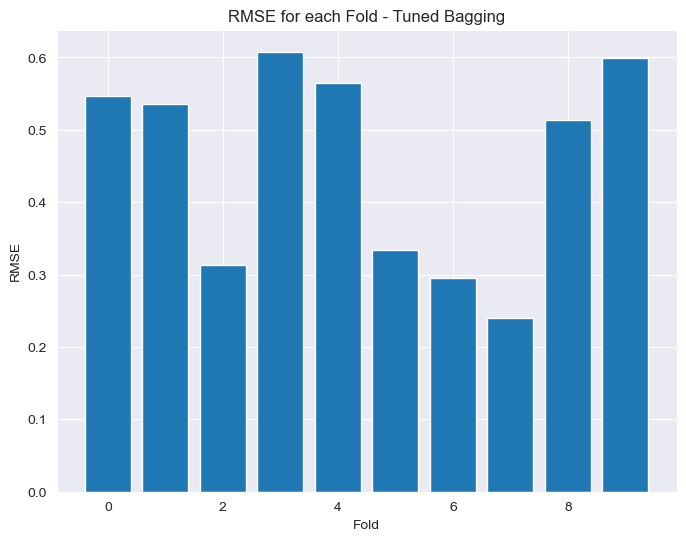

In [34]:
# Transpose the DataFrame to have the folds as columns
Bagging_10folds_transposed = Bagging_10folds.transpose()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(Bagging_10folds_transposed.index, Bagging_10folds_transposed[name])
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('RMSE for each Fold - ' + name)
plt.show()

## Random Forest

In [35]:
%%time

Random_Forest = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [25, 50, 100, 200, 300, 500],  # Number of decision trees in the random forest
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the decision trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 8),  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider at each split
    'bootstrap': [True, False],  # Whether to sample with replacement (True) or without replacement (False)
    'random_state': [42]  # Random seed for reproducibility
}

scorer = metrics.make_scorer(mean_squared_error, greater_is_better=False)

randomized_cv = RandomizedSearchCV(estimator=Random_Forest, param_distributions=param_grid, n_iter=30, n_jobs = -1, scoring=scorer, cv=10, random_state=42)

randomized_cv.fit(X, Y)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'random_state': 42, 'n_estimators': 25, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False} with CV score=-0.6510148346666665:
CPU times: total: 1.22 s
Wall time: 5 s


In [36]:
Tuned_Forest = randomized_cv.best_estimator_

scoring = make_scorer(mean_squared_error, greater_is_better=False)
cv_results = cross_val_score(Tuned_Forest, X, Y, cv=kfold, scoring=scoring)

# Calculate RMSE from the negative mean squared error
rmse_scores = np.sqrt(-cv_results)

# Calculate additional performance metrics
mae_scores = cross_val_score(Tuned_Forest, X, Y, cv=kfold, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(Tuned_Forest, X, Y, cv=kfold, scoring='r2')
adj_r2_scores = cross_val_score(Tuned_Forest, X, Y, cv=kfold, scoring=make_scorer(adjusted_r2_score, n_samples=X.shape[0], n_features=X.shape[1]))

# Store results
Forest_results = rmse_scores

Mean_Forest_rmse = [rmse_scores.mean()]
Mean_Forest_mae = [-mae_scores.mean()]  # Convert back to positive MAE
Mean_Forest_r2 = [r2_scores.mean()]
Mean_Forest_adj_r2 = [adj_r2_scores.mean()]

# Create a dataframe with the performance results
Tuned_Forest_results = pd.DataFrame({
    'Model': 'Tuned Forest',
    'Mean RMSE': Mean_Forest_rmse,
    'Mean MAE': Mean_Forest_mae,
    'Mean R2': Mean_Forest_r2,
    'Mean Adj R2': Mean_Forest_adj_r2
})

Tuned_Forest_results

,Model,Mean RMSE,Mean MAE,Mean R2,Mean Adj R2
0,Tuned Forest,0.390,0.329,0.751,0.676


In [37]:
name = 'Tuned Forest'
Forest_10folds = pd.DataFrame(Forest_results.reshape(1, -1), index=[name])
Forest_10folds

,0,1,2,3,4,5,6,7,8,9
Tuned Forest,0.570,0.562,0.273,0.565,0.453,0.422,0.169,0.177,0.376,0.329


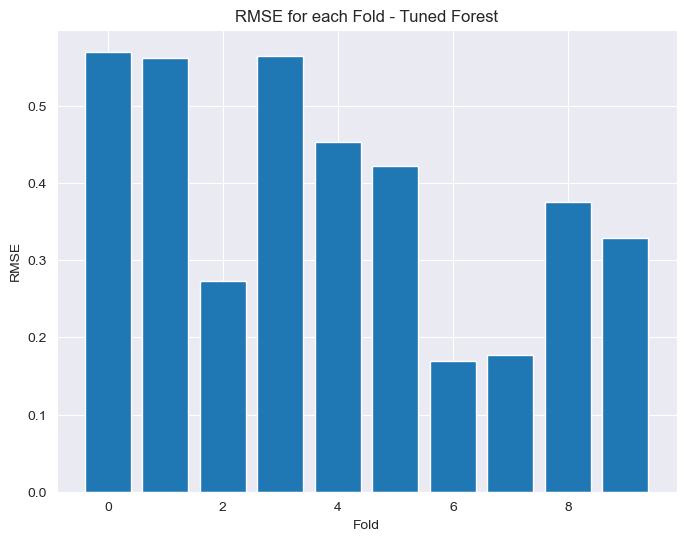

In [38]:
# Transpose the DataFrame to have the folds as columns
Forest_10folds_transposed = Forest_10folds.transpose()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(Forest_10folds_transposed.index, Forest_10folds_transposed[name])
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('RMSE for each Fold - ' + name)
plt.show()

## Ada Boost

In [39]:
%%time

Ada_boost = AdaBoostRegressor(random_state=42)

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05],
    "base_estimator": [
        DecisionTreeRegressor(max_depth=depth, random_state=42) for depth in range(1, 8)
    ],
    "random_state": [42]
}

scorer = metrics.make_scorer(mean_squared_error, greater_is_better=False)

randomized_cv = RandomizedSearchCV(estimator=Ada_boost, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=10, random_state=42)

randomized_cv.fit(X, Y)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'random_state': 42, 'n_estimators': 40, 'learning_rate': 0.1, 'base_estimator': DecisionTreeRegressor(max_depth=6, random_state=42)} with CV score=-0.7293224628995512:
CPU times: total: 172 ms
Wall time: 988 ms


`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


In [40]:
Tuned_Ada = randomized_cv.best_estimator_

scoring = make_scorer(mean_squared_error, greater_is_better=False)
cv_results = cross_val_score(Tuned_Ada, X, Y, cv=kfold, scoring=scoring)

# Calculate RMSE from the negative mean squared error
rmse_scores = np.sqrt(-cv_results)

# Calculate additional performance metrics
mae_scores = cross_val_score(Tuned_Ada, X, Y, cv=kfold, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(Tuned_Ada, X, Y, cv=kfold, scoring='r2')
adj_r2_scores = cross_val_score(Tuned_Ada, X, Y, cv=kfold, scoring=make_scorer(adjusted_r2_score, n_samples=X.shape[0], n_features=X.shape[1]))

# Store results
Ada_results = rmse_scores

Mean_Ada_rmse = [rmse_scores.mean()]
Mean_Ada_mae = [-mae_scores.mean()]  # Convert back to positive MAE
Mean_Ada_r2 = [r2_scores.mean()]
Mean_Ada_adj_r2 = [adj_r2_scores.mean()]

# Create a dataframe with the performance results
Tuned_Ada_results = pd.DataFrame({
    'Model': 'Tuned Ada',
    'Mean RMSE': Mean_Ada_rmse,
    'Mean MAE': Mean_Ada_mae,
    'Mean R2': Mean_Ada_r2,
    'Mean Adj R2': Mean_Ada_adj_r2
})

Tuned_Ada_results

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator`

,Model,Mean RMSE,Mean MAE,Mean R2,Mean Adj R2
0,Tuned Ada,0.498,0.411,0.604,0.484


In [41]:
name = 'Ada'
Ada_10folds = pd.DataFrame(Ada_results.reshape(1, -1), index=[name])
Ada_10folds

,0,1,2,3,4,5,6,7,8,9
Ada,0.602,0.567,0.315,0.587,0.657,0.584,0.339,0.256,0.407,0.667


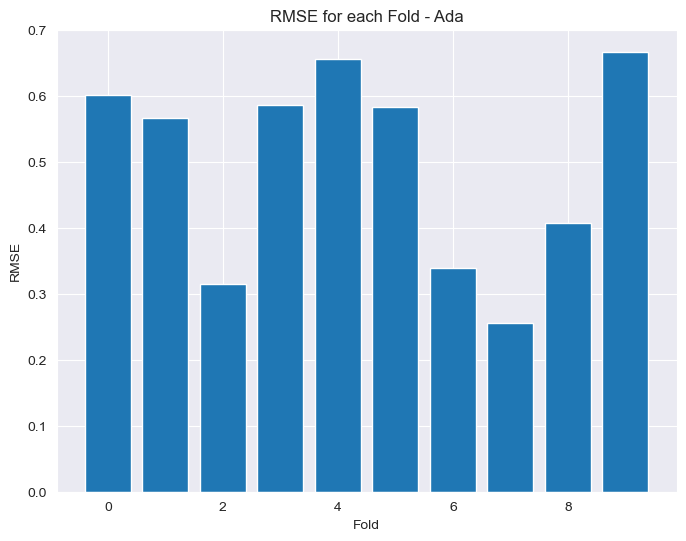

In [42]:
# Transpose the DataFrame to have the folds as columns
Ada_10folds_transposed = Ada_10folds.transpose()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(Ada_10folds_transposed.index, Ada_10folds_transposed[name])
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('RMSE for each Fold - ' + name)
plt.show()

## Gradient Boosting

In [43]:
%%time

GradientBoost = GradientBoostingRegressor(random_state=42)

param_grid = {
    "init": [AdaBoostRegressor(random_state=42),DecisionTreeRegressor(random_state=42)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

scorer = metrics.make_scorer(mean_squared_error, greater_is_better=False)

randomized_cv = RandomizedSearchCV(estimator=GradientBoost, param_distributions=param_grid, n_iter=30, n_jobs = -1, scoring=scorer, cv=10, random_state=42)

randomized_cv.fit(X, Y)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 1, 'learning_rate': 0.2, 'init': AdaBoostRegressor(random_state=42)} with CV score=-0.8387794456903268:
CPU times: total: 797 ms
Wall time: 2.31 s


In [44]:
Tuned_Gra = randomized_cv.best_estimator_

scoring = make_scorer(mean_squared_error, greater_is_better=False)
cv_results = cross_val_score(Tuned_Gra, X, Y, cv=kfold, scoring=scoring)

# Calculate RMSE from the negative mean squared error
rmse_scores = np.sqrt(-cv_results)

# Calculate additional performance metrics
mae_scores = cross_val_score(Tuned_Gra, X, Y, cv=kfold, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(Tuned_Gra, X, Y, cv=kfold, scoring='r2')
adj_r2_scores = cross_val_score(Tuned_Gra, X, Y, cv=kfold, scoring=make_scorer(adjusted_r2_score, n_samples=X.shape[0], n_features=X.shape[1]))

# Store results
Gra_results = rmse_scores

Mean_Gra_rmse = [rmse_scores.mean()]
Mean_Gra_mae = [-mae_scores.mean()]  # Convert back to positive MAE
Mean_Gra_r2 = [r2_scores.mean()]
Mean_Gra_adj_r2 = [adj_r2_scores.mean()]

# Create a dataframe with the performance results
Tuned_Gra_results = pd.DataFrame({
    'Model': 'Tuned Gra',
    'Mean RMSE': Mean_Gra_rmse,
    'Mean MAE': Mean_Gra_mae,
    'Mean R2': Mean_Gra_r2,
    'Mean Adj R2': Mean_Gra_adj_r2
})

Tuned_Gra_results

,Model,Mean RMSE,Mean MAE,Mean R2,Mean Adj R2
0,Tuned Gra,0.422,0.330,0.741,0.663


In [45]:
name = 'Gra'
Gra_10folds = pd.DataFrame(Gra_results.reshape(1, -1), index=[name])
Gra_10folds

,0,1,2,3,4,5,6,7,8,9
Gra,0.563,0.602,0.440,0.537,0.264,0.466,0.215,0.150,0.387,0.596


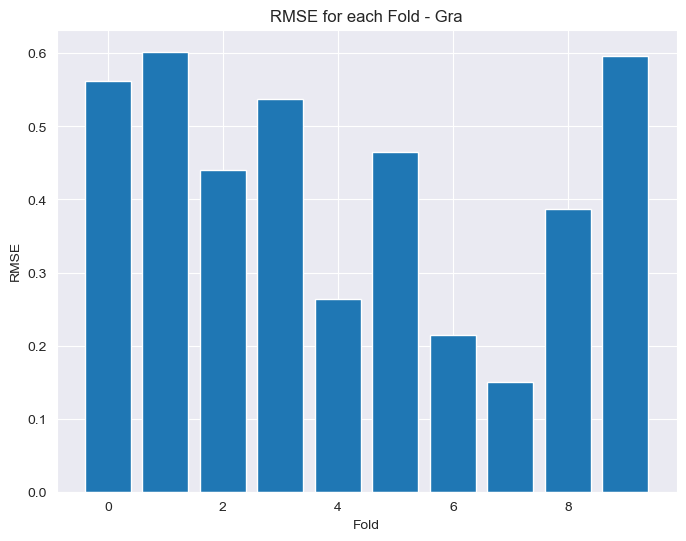

In [46]:
# Transpose the DataFrame to have the folds as columns
Gra_10folds_transposed = Gra_10folds.transpose()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(Gra_10folds_transposed.index, Gra_10folds_transposed[name])
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('RMSE for each Fold - ' + name)
plt.show()

## XG Boost

In [47]:
%%time

XG_boost = XGBRegressor(random_state = 42)

param_grid={
    'n_estimators':np.arange(50,300,50),
    'scale_pos_weight':[0,1,2,5,10],
    'learning_rate':[0.01,0.1,0.2,0.05],
    'gamma':[0,1,3,5],
    'subsample':[0.7,0.8,0.9,1]
    
}

scorer = metrics.make_scorer(mean_squared_error, greater_is_better=False)

randomized_cv = RandomizedSearchCV(estimator=XG_boost, param_distributions=param_grid, n_iter=30, n_jobs = -1, scoring=scorer, cv=10, random_state=42)

randomized_cv.fit(X, Y)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 2, 'n_estimators': 150, 'learning_rate': 0.2, 'gamma': 1} with CV score=-1.1261184534391646:
CPU times: total: 2.98 s
Wall time: 2.26 s


In [48]:
Tuned_XG = randomized_cv.best_estimator_

scoring = make_scorer(mean_squared_error, greater_is_better=False)
cv_results = cross_val_score(Tuned_XG, X, Y, cv=kfold, scoring=scoring)

# Calculate RMSE from the negative mean squared error
rmse_scores = np.sqrt(-cv_results)

# Calculate additional performance metrics
mae_scores = cross_val_score(Tuned_XG, X, Y, cv=kfold, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(Tuned_XG, X, Y, cv=kfold, scoring='r2')
adj_r2_scores = cross_val_score(Tuned_XG, X, Y, cv=kfold, scoring=make_scorer(adjusted_r2_score, n_samples=X.shape[0], n_features=X.shape[1]))

# Store results
XG_results = rmse_scores

Mean_XG_rmse = [rmse_scores.mean()]
Mean_XG_mae = [-mae_scores.mean()]  # Convert back to positive MAE
Mean_XG_r2 = [r2_scores.mean()]
Mean_XG_adj_r2 = [adj_r2_scores.mean()]

# Create a dataframe with the performance results
Tuned_XG_results = pd.DataFrame({
    'Model': 'Tuned XG',
    'Mean RMSE': Mean_XG_rmse,
    'Mean MAE': Mean_XG_mae,
    'Mean R2': Mean_XG_r2,
    'Mean Adj R2': Mean_XG_adj_r2
})

Tuned_XG_results

,Model,Mean RMSE,Mean MAE,Mean R2,Mean Adj R2
0,Tuned XG,0.647,0.526,0.262,0.039


In [49]:
name = 'XG'
XG_10folds = pd.DataFrame(XG_results.reshape(1, -1), index=[name])
XG_10folds

,0,1,2,3,4,5,6,7,8,9
XG,0.714,0.738,0.754,1.035,0.544,0.564,0.670,0.326,0.526,0.600


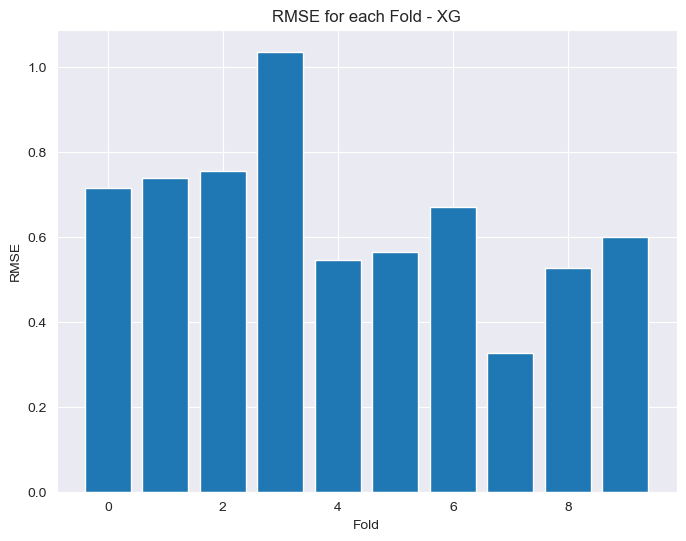

In [50]:
# Transpose the DataFrame to have the folds as columns
XG_10folds_transposed = XG_10folds.transpose()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(XG_10folds_transposed.index, XG_10folds_transposed[name])
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('RMSE for each Fold - ' + name)
plt.show()

# Summary

In [51]:
combined_results = pd.concat([df_results,Tuned_Bagging_results, Tuned_Forest_results, Tuned_Ada_results, Tuned_Gra_results ,Tuned_XG_results], ignore_index=True)
combined_results

,Model,Mean RMSE,Mean MAE,Mean R2,Mean Adj R2
0,Bagging,0.515,0.427,0.440,0.271
1,Random forest,0.476,0.395,0.598,0.476
2,AdaBoost,0.552,0.451,0.376,0.187
3,Gradient_Boost,0.445,0.353,0.692,0.598
4,XGBoost,0.501,0.415,0.508,0.360
5,Tuned Bagging,0.455,0.377,0.643,0.535
6,Tuned Forest,0.390,0.329,0.751,0.676
7,Tuned Ada,0.498,0.411,0.604,0.484
8,Tuned Gra,0.422,0.330,0.741,0.663
9,Tuned XG,0.647,0.526,0.262,0.039


# Best model

* Tuned forest is the best.

In [52]:
# Perform cross-validation and obtain predicted values
y_pred_cv = cross_val_predict(Tuned_Forest, X, Y, cv=kfold)

# Create a dataframe with the true values and predicted values for all cross-validation folds
df_predictions_cv = pd.DataFrame({'True Values': Y, 'Predicted Values': y_pred_cv})
df_predictions_cv['Difference'] = df_predictions_cv['True Values'] - df_predictions_cv['Predicted Values']
# Reset the indices of the df_predictions_cv dataframe
df_predictions_cv.reset_index(drop=True, inplace=True)

df_predictions_cv

,True Values,Predicted Values,Difference
0,5.270,5.146,0.124
1,5.450,5.126,0.324
2,5.230,5.009,0.221
3,4.510,4.018,0.492
4,3.130,3.262,-0.132
5,5.760,5.155,0.605
6,5.700,5.285,0.415
7,4.900,4.755,0.145
8,3.930,4.004,-0.074
9,3.750,4.069,-0.319


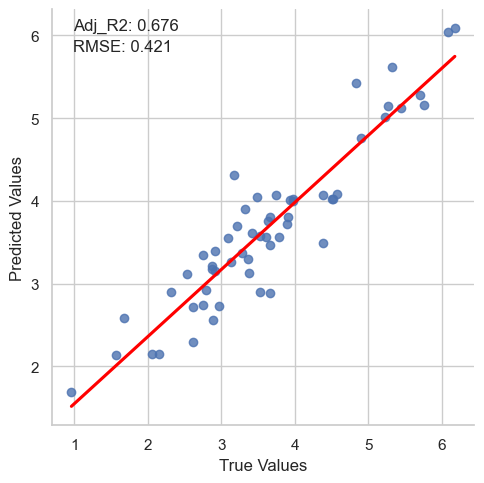

In [53]:
# Calculate RMSE and adjusted R-squared for the cross-validated predictions
rmse_cv = mean_squared_error(df_predictions_cv['True Values'], df_predictions_cv['Predicted Values'], squared=False)
adj_r2_cv = cross_val_score(Tuned_Forest, X, Y, cv=kfold, scoring=make_scorer(adjusted_r2_score, n_samples=X.shape[0], n_features=X.shape[1]))

# Create the lmplot
sns.set(style="whitegrid")
lm_plot_cv = sns.lmplot(data=df_predictions_cv, x='True Values', y='Predicted Values', ci=True, line_kws={'color': 'red'})

# Annotate the plot with adjusted R-squared and RMSE
plt.text(0.05, 0.95, f'Adj_R2: {adj_r2_cv.mean():.3f}', transform=plt.gca().transAxes)
plt.text(0.05, 0.9, f'RMSE: {rmse_cv:.3f}', transform=plt.gca().transAxes)

# Display the plot
plt.show()

# SHAP

In [54]:
shap_per_fold = []
ix_training, ix_testing = [], []

# Loop through each fold and append training and test indices
for fold in kfold.split(new_df_drop):
    ix_training.append(fold[0]), ix_testing.append(fold[1])

# Loop through each outer fold and extract SHAP values     
for i, (train_outer_ix, test_outer_ix) in enumerate(zip(ix_training, ix_testing)): #-#-#
    #Verbose
    print('\n------ Fold Number:',i)
    X_train, X_test = X.iloc[train_outer_ix, :], X.iloc[test_outer_ix, :]
    y_train, y_test = Y.iloc[train_outer_ix], Y.iloc[test_outer_ix]
    
    model = Tuned_Forest
    fit = model.fit(X_train, y_train)
    y_hat = fit.predict(X_test)
    result = mean_squared_error(y_test, y_hat)
    print('RMSE:',round(np.sqrt(result),4))

    # Use SHAP to explain predictions
    explainer = shap.Explainer(model)
    shap_values = explainer.shap_values(X_test)
    shap_values[np.isnan(shap_values)] = 0  # Replace np.nan with 0
    shap_per_fold.append(shap_values)


------ Fold Number: 0
RMSE: 0.5701

------ Fold Number: 1
RMSE: 0.5622

------ Fold Number: 2
RMSE: 0.2734

------ Fold Number: 3
RMSE: 0.5649

------ Fold Number: 4
RMSE: 0.4529

------ Fold Number: 5
RMSE: 0.4225

------ Fold Number: 6
RMSE: 0.169

------ Fold Number: 7
RMSE: 0.177

------ Fold Number: 8
RMSE: 0.3757

------ Fold Number: 9
RMSE: 0.3288


In [55]:
shap_per_fold

[array([[ 0.40833051, -0.01887324,  0.02596901,  0.09084559,  0.04918809,
         -0.07920605,  0.23820019,  0.04297335,  0.10710087,  0.4095893 ,
          0.16096028,  0.03066524,  0.08633529],
        [ 0.33055424, -0.01969282,  0.05195399,  0.08850162,  0.03368487,
          0.14227227,  0.19100432,  0.04683316,  0.07503553,  0.35803731,
          0.11040148,  0.06105769,  0.09123476],
        [ 0.28351381, -0.0172045 , -0.00340495,  0.02845001,  0.03467942,
          0.00809263, -0.11139211,  0.04137628,  0.04678915, -0.00483716,
          0.13359177,  0.01786752,  0.03175656],
        [-0.20033634, -0.04518567, -0.22772011,  0.03372214, -0.17742327,
         -0.14353052, -0.02883046, -0.12318515, -0.13067699, -0.1485632 ,
          0.02014074, -0.03225946, -0.09087329],
        [-0.15109896, -0.03901709, -0.10977366,  0.06988319, -0.09722265,
         -0.13603854, -0.01129834,  0.06277049, -0.10116997, -0.07291954,
         -0.0262204 , -0.02036672, -0.06104938],
        [-0.139

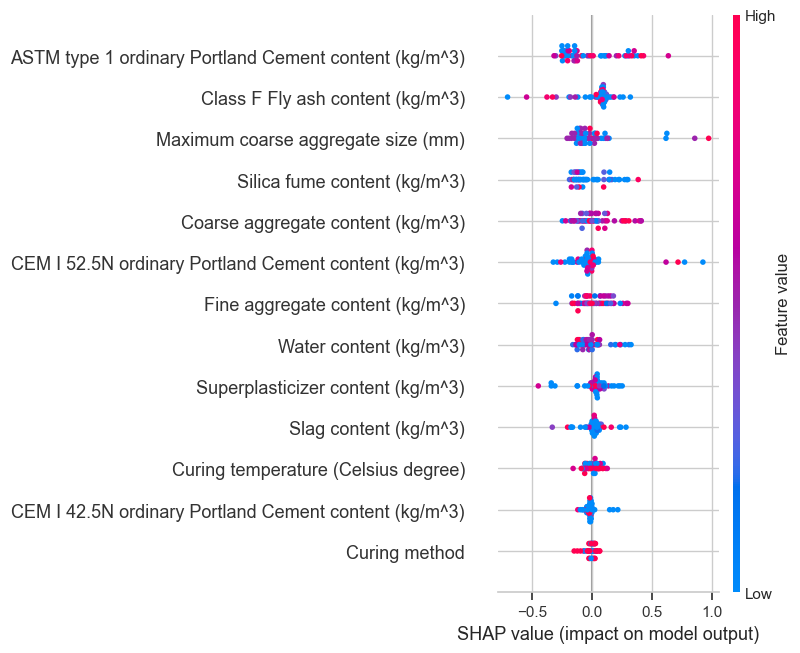

In [56]:
# Concatenate the SHAP values along the first axis
shap_values_all = np.concatenate(shap_per_fold, axis=0)

# Create a single Explanation object with all the SHAP values and feature names
explanation = shap.Explanation(values=shap_values_all, feature_names=X.columns)

# Plot the Bee Swarm plot
shap.summary_plot(shap_values_all, X, feature_names=X.columns)

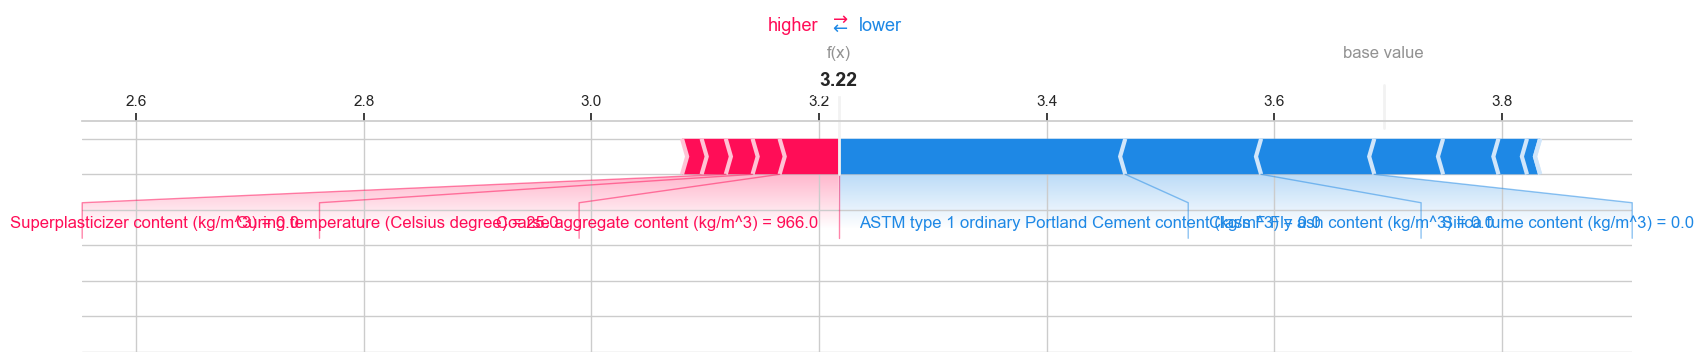

In [57]:
sample_ind = 30
shap.force_plot(explainer.expected_value, explanation.values[sample_ind], X.iloc[sample_ind], feature_names=X.columns, matplotlib=True)

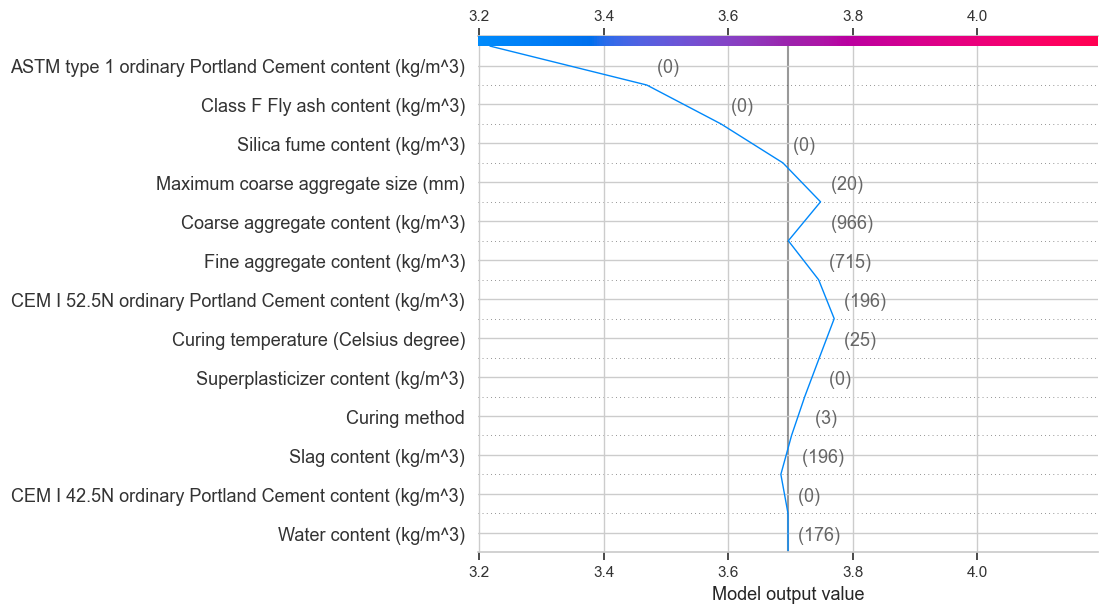

In [58]:
sample_ind = 30
shap_values_sample = shap_values_all[sample_ind, :]
sample_values = X.iloc[sample_ind, :]

# Calculate SHAP values
explainer = shap.Explainer(Tuned_Forest)
shap_values = explainer.shap_values(sample_values)

# Create an Explanation object
base_value = explainer.expected_value  # Get the base value from the explainer
explanation_sample = shap.Explanation(values=shap_values_sample,
                                      base_values=base_value,
                                      data=sample_values.values,
                                      feature_names=X.columns)

# Plot the decision plot
shap.decision_plot(base_value, explanation_sample.values, sample_values)

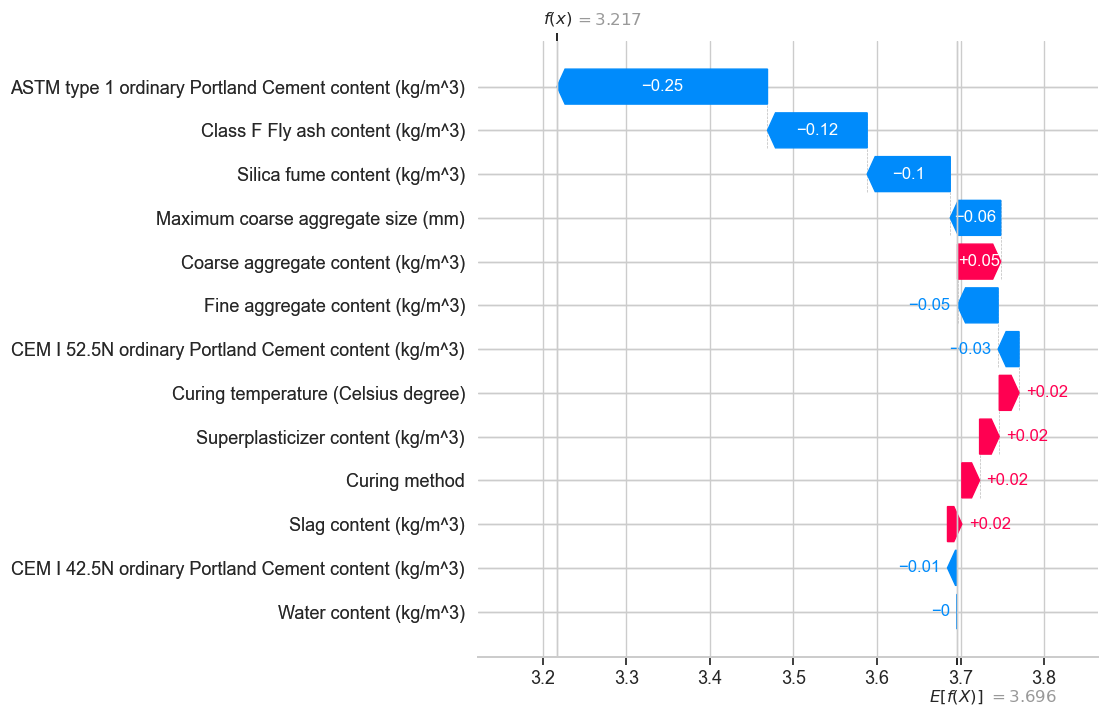

In [65]:
# Select the SHAP values for the desired sample
sample_shap_values = shap_values_all[30]

# Set the base value for the sample (you need to replace 'base_value' with the actual base value)
base_value = base_value  # Replace 'base_value' with the actual base value

# Create an Explanation object for the sample
sample_explanation = shap.Explanation(values=sample_shap_values, feature_names=X.columns, base_values=base_value)

# Plot the waterfall plot for the sample
shap.waterfall_plot(sample_explanation, max_display=20)